### Import some requires libs

In [2]:

import os
import pandas as pd
import pandas as pd
import json
from ydata_profiling import ProfileReport
# from ydata_profiling.utils.cache import cache_file
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Metadata and Mapping information

In [4]:
#load metadata
with open('data/processing/metadata.json', 'r') as f:
    definitions = json.load(f)

with open('data/processing/industry-recode.json', 'r') as f:
    industry_recode = json.load(f)

with open('data/processing/occupasion-recode.json', 'r') as f:
    occupasion_recode = json.load(f)

with open('data/processing/education-recode.json', 'r') as f:
    education_recoder = json.load(f)

with open('data/processing/martial-recode.json', 'r') as f:
    martial_recoder = json.load(f)

with open('data/processing/unemployment-recode.json', 'r') as f:
    unemployment_recoder = json.load(f)

with open('data/processing/typeemployment-recode.json', 'r') as f:
    typeemployment_recoder = json.load(f)

with open('data/processing/migrationwithin-recode.json', 'r') as f:
    migrationwithin_recoder = json.load(f)

with open('data/processing/broader_values_mapping.json', 'r') as f:
    broader_values_mapping = json.load(f)

with open('data/processing/class_worker_mapping.json', 'r') as f:
    class_worker_mapping = json.load(f)

with open('data/processing/household_status_mapping.json', 'r') as f:
    household_status_mapping = json.load(f)

with open('data/processing/msa_migration_mapping.json', 'r') as f:
    msa_migration_mapping = json.load(f)

with open('data/processing/tax_status_mapping.json', 'r') as f:
    tax_status_mapping = json.load(f)


In [12]:
#load the data
df = pd.read_csv('data/raw/census_income_learn.csv', header=None, names=definitions.keys())
print(f'Shape of the Training Set {df.shape}')

Shape of the Training Set (199523, 42)


In [11]:
df_test = pd.read_csv('data/raw/census_income_test.csv', header=None, names=definitions.keys())
print(f'Shape of the Test Set {df.shape}')

Shape of the Test Set (199523, 42)


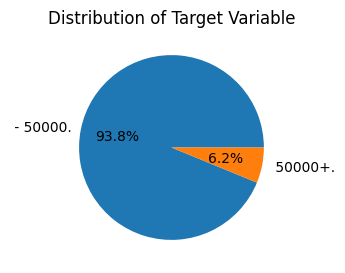

In [22]:
plt.figure(figsize=(4, 3))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Target Variable')
plt.show()

### Dropping duplicated values from the train set 

In [23]:
# Remove duplicates and keep the first occurrence

print(f"Number of duplicates: {df.shape[0] - df.drop_duplicates().shape[0]} which is {((df.shape[0] - df.drop_duplicates().shape[0]) / df.shape[0]) * 100:.2f}% of the data")
# df = df.drop_duplicates()


Number of duplicates: 3229 which is 1.62% of the data


### Cleaning and Mapping the Categorical Columns

In [5]:
# cleaning

# remove ignore col
try: 
    df.drop(columns=['ignore'], inplace=True)
except:
    pass

# fix year"
if df['year'].min() < 100:
    df['year'] = df['year'] + 1900

# map industry code
if df['detailed_industry_recode'].dtype == 'int64':
    df['detailed_industry_recode'] = df['detailed_industry_recode'].astype(str).map(industry_recode)

# map occupation code
if df['detailed_occupation_recode'].dtype == 'int64':
    df['detailed_occupation_recode'] = df['detailed_occupation_recode'].astype(str).map(occupasion_recode)

if 'Advanced Degree' not in df['education'].unique():
    df['education'] = df['education'].map(education_recoder)

if 'Married' not in df['marital_stat'].unique():
    df['marital_stat'] = df['marital_stat'].map(martial_recoder)

if ' Other job loser' in df['reason_for_unemployment'].unique():
    df['reason_for_unemployment'] = df['reason_for_unemployment'].map(unemployment_recoder)

if ' Not in labor force' in df['full_or_part_time_employment_stat'].unique():
    df['full_or_part_time_employment_stat'] = df['full_or_part_time_employment_stat'].map(typeemployment_recoder)

df['migration_prev_res_in_sunbelt'] = df['migration_prev_res_in_sunbelt'].replace(' ?', 'Not in universe')

df['migration_code_change_in_reg'] = df['migration_code_change_in_reg'].map(migrationwithin_recoder)

# map values 

df['migration_code_change_in_msa'] = df['migration_code_change_in_msa'].map(msa_migration_mapping)
df['detailed_household_and_family_stat'] = df['detailed_household_and_family_stat'].map(household_status_mapping)
df['migration_code_change_in_reg'].map(broader_values_mapping)
df['tax_filer_stat'] = df['tax_filer_stat'].map(tax_status_mapping)
df['class_of_worker'] = df['class_of_worker'].map(class_worker_mapping)

# map additional values
veteran_status_mapping = {
    2: 'Not a Veteran',
    1: 'Veteran',
    0: 'Not in universe'
}
df['veterans_benefits'] = df['veterans_benefits'].map(veteran_status_mapping)

selfemployed_mapping = {
    2: 'No',
    1: 'Yes',
    0: 'Not in universe'
}
df['own_business_or_self_employed'] = df['own_business_or_self_employed'].map(selfemployed_mapping)

# replacement values
df['migration_prev_res_in_sunbelt']=df['migration_prev_res_in_sunbelt'].replace('Not in universe', 'Not in universe').replace(' Not in universe', 'Not in universe')
df['live_in_this_house_1_year_ago']=df['live_in_this_house_1_year_ago'].replace(' Not in universe under 1 year old', 'Not in universe')

# replacing the  target column
df['target'] = df['target'].replace(' - 50000.', '1').replace(' 50000+.', '0')

In [13]:
profile_minimial = ProfileReport(df, title="census data report", minimal=True)

In [8]:
profile.to_file('data/processing/census_data_process_report.json')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
profile.to_file('data/processing/census_data_process_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile_minimial.to_file('data/processing/census_data_process_report_minimal.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('data/processed/census_income_test.csv')

In [3]:
import os
import pandas as pd
from ydata_profiling import ProfileReport
import json

#load metadata
with open('data/processing/metadata.json', 'r') as f:
    definitions = json.load(f)

with open('data/processing/industry-recode.json', 'r') as f:
    industry_recode = json.load(f)

with open('data/processing/occupasion-recode.json', 'r') as f:
    occupasion_recode = json.load(f)

with open('data/processing/education-recode.json', 'r') as f:
    education_recoder = json.load(f)

with open('data/processing/martial-recode.json', 'r') as f:
    martial_recoder = json.load(f)

with open('data/processing/unemployment-recode.json', 'r') as f:
    unemployment_recoder = json.load(f)

with open('data/processing/typeemployment-recode.json', 'r') as f:
    typeemployment_recoder = json.load(f)

with open('data/processing/migrationwithin-recode.json', 'r') as f:
    migrationwithin_recoder = json.load(f)

with open('data/processing/broader_values_mapping.json', 'r') as f:
    broader_values_mapping = json.load(f)

with open('data/processing/class_worker_mapping.json', 'r') as f:
    class_worker_mapping = json.load(f)

with open('data/processing/household_status_mapping.json', 'r') as f:
    household_status_mapping = json.load(f)

with open('data/processing/msa_migration_mapping.json', 'r') as f:
    msa_migration_mapping = json.load(f)

with open('data/processing/tax_status_mapping.json', 'r') as f:
    tax_status_mapping = json.load(f)

with open("data/processing/citizenship_mapping.json", "r") as f:
    citizenship_mapping = json.load(f)

def load_data(file_dir: str) -> pd.DataFrame:
    '''
    this function loads the data and applies the necessary cleaning steps
        input: file_dir: str: the path to the file
        output: df: pd.DataFrame: the cleaned dataframe
    '''

    #load the data
    df = pd.read_csv(file_dir, header=None, names=definitions.keys())
    
    # Remove duplicates and keep the first occurrence
    print(f"Number of duplicate rows removed: {df.shape[0] - df.drop_duplicates().shape[0]}")
    df = df.drop_duplicates()

    # cleaning
    # remove ignore col
    try: 
        df.drop(columns=['ignore'], inplace=True)
    except:
        pass

    # fix year"
    if df['year'].min() < 100:
        df['year'] = df['year'] + 1900

    # map industry code
    if df['detailed_industry_recode'].dtype == 'int64':
        df['detailed_industry_recode'] = df['detailed_industry_recode'].astype(str).map(industry_recode)

    # map occupation code
    if df['detailed_occupation_recode'].dtype == 'int64':
        df['detailed_occupation_recode'] = df['detailed_occupation_recode'].astype(str).map(occupasion_recode)

    if 'Advanced Degree' not in df['education'].unique():
        df['education'] = df['education'].map(education_recoder)

    if 'Married' not in df['marital_stat'].unique():
        df['marital_stat'] = df['marital_stat'].map(martial_recoder)

    if ' Other job loser' in df['reason_for_unemployment'].unique():
        df['reason_for_unemployment'] = df['reason_for_unemployment'].map(unemployment_recoder)

    if ' Not in labor force' in df['full_or_part_time_employment_stat'].unique():
        df['full_or_part_time_employment_stat'] = df['full_or_part_time_employment_stat'].map(typeemployment_recoder)

    df['migration_prev_res_in_sunbelt'] = df['migration_prev_res_in_sunbelt'].replace(' ?', 'Not in universe')

    df['migration_code_change_in_reg'] = df['migration_code_change_in_reg'].map(migrationwithin_recoder)

    # map values 

    df['migration_code_change_in_msa'] = df['migration_code_change_in_msa'].map(msa_migration_mapping)
    df['detailed_household_and_family_stat'] = df['detailed_household_and_family_stat'].map(household_status_mapping)
    df['migration_code_change_in_reg'].map(broader_values_mapping)
    df['tax_filer_stat'] = df['tax_filer_stat'].map(tax_status_mapping)
    df['class_of_worker'] = df['class_of_worker'].map(class_worker_mapping)
    df['citizenship'] = df['citizenship'].map(citizenship_mapping)

    # map additional values
    veteran_status_mapping = {
        2: 'Not a Veteran',
        1: 'Veteran',
        0: 'Not in universe'
    }
    df['veterans_benefits'] = df['veterans_benefits'].map(veteran_status_mapping)

    selfemployed_mapping = {
        2: 'No',
        1: 'Yes',
        0: 'Not in universe'
    }
    df['own_business_or_self_employed'] = df['own_business_or_self_employed'].map(selfemployed_mapping)

    # replacement values
    df['migration_prev_res_in_sunbelt']=df['migration_prev_res_in_sunbelt'].replace('Not in universe', 'Not in universe').replace(' Not in universe', 'Not in universe')
    df['live_in_this_house_1_year_ago']=df['live_in_this_house_1_year_ago'].replace(' Not in universe under 1 year old', 'Not in universe')

    # replacing the  target column
    df['target'] = df['target'].replace(' - 50000.', '1').replace(' 50000+.', '0')

    return df

In [9]:
import json
import pandas as pd
with open('report/processed/census_income_learn.csv.json') as j:
    corr = pd.DataFrame(json.load(j)['correlations']['auto'])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.title("Correlation Heatmap")
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns)
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Keep y labels horizontal for better readability
plt.tight_layout()
plt.savefig('test.jpg')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

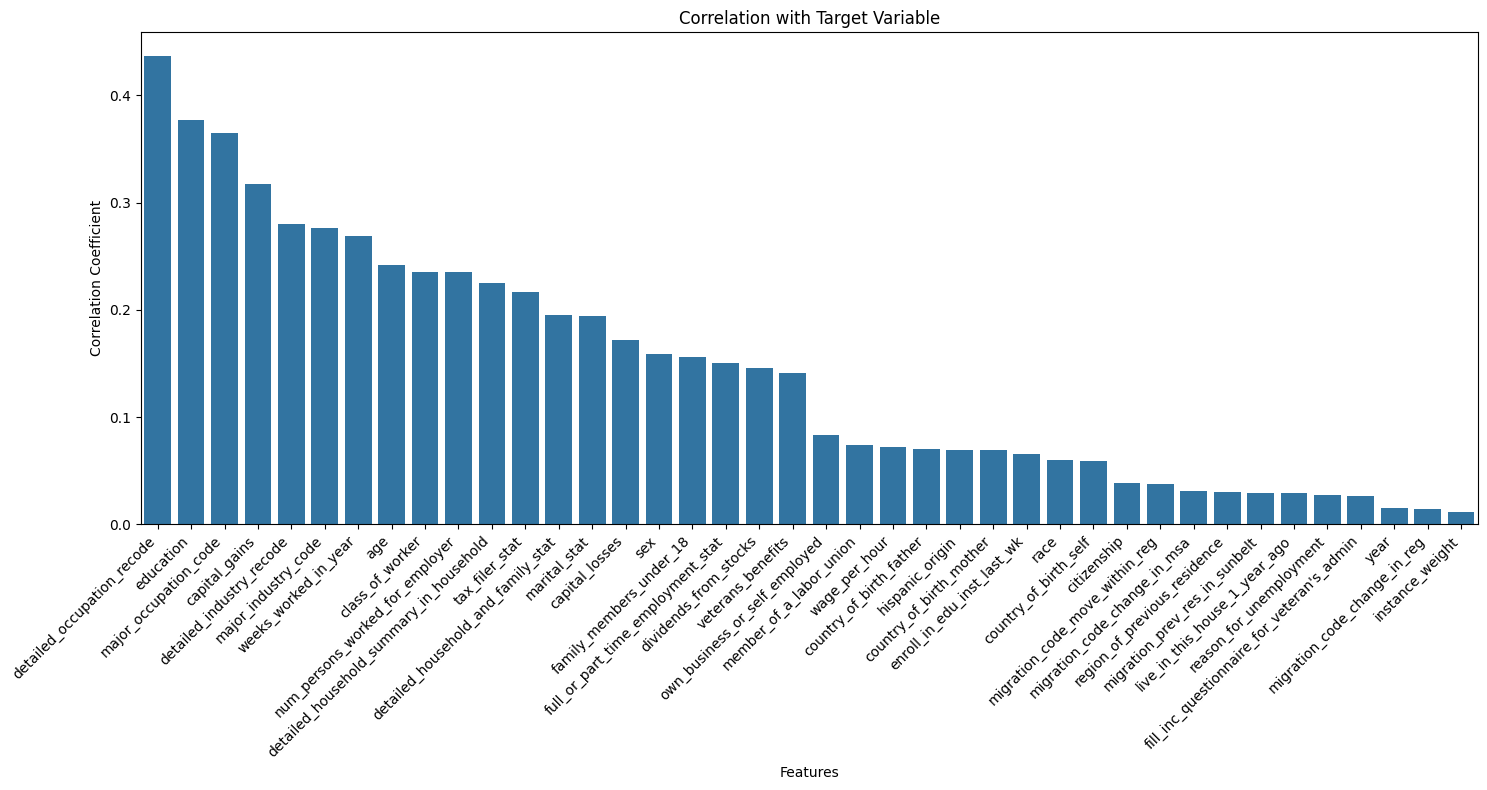

In [22]:
corr_target = corr['target']
corr_target.index = corr.columns
corr_target.drop('target', axis = 0, inplace= True)
corr_target = corr_target.sort_values(ascending= False) 
# Create figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create barplot with rotated x labels
sns.barplot(x=corr_target.index, y=corr_target.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Adjust layout to prevent label cutoff
plt.tight_layout()

NameError: name 'plt' is not defined

In [ ]:
# Get correlations with target
target_correlations = corr['target'].drop('target').sort_values()

# Create figure
plt.figure(figsize=(15, 8))

# Create bar plot
plt.bar(range(len(target_correlations)), target_correlations)

# Customize plot
plt.xticks(range(len(target_correlations)), target_correlations.index, rotation=90)
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.savefig('test2.jpg')